### Regressão no Scikit-Learn
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
<br><br>
- Vamos usar a base de ações da Tesla para tentar prever a quantidade de ações vendidas no dia
    - Base: https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020

In [75]:
import pandas as pd

In [76]:
# Importando a base
base = pd.read_csv('TSLA.csv',parse_dates=['Date'])

In [77]:
# Visualizando as primeiras linhas
base.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [78]:
# Visualizando as informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.2 KB


In [79]:
# Verificando valores duplicados
base.duplicated().sum()

0

In [80]:
# Obtendo as informações estatísticas
base.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


array([[<AxesSubplot:title={'center':'Open'}>]], dtype=object)

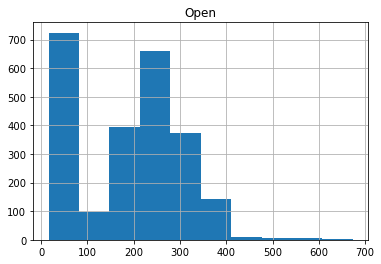

In [81]:
# Visualizando o histograma dos dados
base.hist('Open')

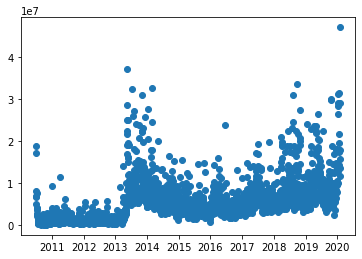

In [82]:
# Gerando um gráfico de dispersão para verificar a relação entre as informações
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(base.Date, base.Volume)

plt.show()

### Separando em treino e teste
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(base.Open,base.Volume, test_size=0.33, random_state=42)

In [84]:
X_train

1572    206.500000
393      27.190001
998     224.110001
534      29.520000
30       18.690001
           ...    
1638    218.559998
1095    243.000000
1130    223.809998
1294    260.329987
860     119.379997
Name: Open, Length: 1618, dtype: float64

### Usando o modelo de regressão linear
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [85]:
# Importando a Regressão Linear
from sklearn.linear_model import LinearRegression

In [86]:
# Criando nosso algoritmo de regressão
reg = LinearRegression().fit(X_train.values.reshape(-1,1), y_train)

In [87]:
# Avaliando o modelo nos dados de TREINO
reg.score(X_train.values.reshape(-1,1), y_train)

0.21503603604976262

In [88]:
# Avaliando o modelo nos dados de TESTE
reg.score(X_test.values.reshape(-1,1), y_test)

0.3284195874914201

In [89]:
# Determinando o coeficiente angular
reg.coef_[0]

20195.187973651628

In [90]:
# Determinando o coeficiente linear
reg.intercept_

1904679.7631864208

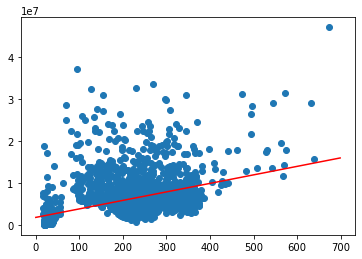

In [91]:
# Visualizando de forma gráfica
import numpy as np

a = reg.coef_[0]
b = reg.intercept_

x = np.arange(0,700)
y = a*x+b

fig, ax = plt.subplots()

ax.scatter(base.Open, base.Volume)
ax.plot(x,y,c='r')

plt.show()

### <font color='blue'> Tratando a variável de data para inserirmos no modelo </font>
- Vamos usar a biblioteca datetime
    - https://docs.python.org/3/library/datetime.html

In [93]:
import datetime as dt

In [96]:
base['Ano'] = base.Date.dt.year
base['Mes'] = base.Date.dt.month

In [136]:
# Usando a maior e menor data
min_date = base.Date.min()
max_date = base.Date.max()

In [138]:
(max_date-min_date).days

3506

In [133]:
base['DateDif'] = (base.Date - min_date).dt.days

In [139]:
base['Dias'] = base.DateDif/(max_date-min_date).days

### Adicionando novas variáveis ao modelo

In [140]:
base.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume,Ano,Mes,DateDif,Dias
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010,6,0,0.000000
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010,6,1,0.000285


In [153]:
# Definindo X e y
X = base[['Open','High']]
y = base.Volume

In [154]:
# Separando novamente em treino e teste
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size=0.33, random_state=42)

In [155]:
# Usando a regressão linear
reg2 = LinearRegression().fit(X_train2, y_train2)

In [156]:
# Avaliando nos dados de treino
reg2.score(X_train2, y_train2)

0.3559489291562341

In [157]:
# Avaliando nos dados de teste
reg2.score(X_test2, y_test2)

0.3968875595816439

In [71]:
# Fazendo a previsão
previsao = reg2.predict(X_train2)

In [72]:
# Coeficiente angular
reg2.coef_

array([-408577.50212954,  421052.85560007])

Variável X 1  >	-408577,5021 <br>
Variável X 2  > 421052,8556

In [73]:
# Coeficiente linear
reg2.intercept_

1928821.1465417575

Interceptar > 1928821,147